In [5]:
# Download packages

from PIL import Image
import imageio
#import multipagetiff as mtif

from matplotlib import pyplot as plt
#from skimage.color import rgb2gray
import scipy.ndimage as ndi 
import numpy as np

import skimage
from skimage.transform import rescale
from skimage.filters import threshold_otsu
from skimage.transform import resize
from skimage import io, morphology

plt.rcParams['figure.dpi'] = 1000
plt.rcParams['savefig.dpi'] = 1000


In [6]:
# Functions
def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)



def cleaning_hole(image) : 
    thresh =  threshold_otsu(image)
    
    binary = np.where(image >=thresh, 1, 0)
    #mask_thresh = ndi.binary_dilation(mask_thresh, iterations = 5)
    #mask_thresh = ndi.binary_closing(mask_thresh, iterations = 5)
    binary = ndi.median_filter(binary, 10)
    binary = skimage.morphology.closing(binary)

    return binary

def sharpen_sig(image, alpha = 30) : 
    blurred_f = ndi.gaussian_filter(image, 3)
    filter_blurred_f = ndi.gaussian_filter(blurred_f, 1)
    
    sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
    
    return sharpened

In [7]:
### Import component file

selected_tiff = read_tiff('Feria/[20456841_Scan1_Core[1,2,B]_[15665,38196]_component_data]_DAPI.tif')
#selected_tiff = selected_tiff[0:9]

#selected_tiff[8] = rescale(selected_tiff[8], 8, channel_axis = 2)

In [8]:
np.shape(selected_tiff)

(1, 4396, 4396, 3)

IndexError: index 1 is out of bounds for axis 0 with size 1

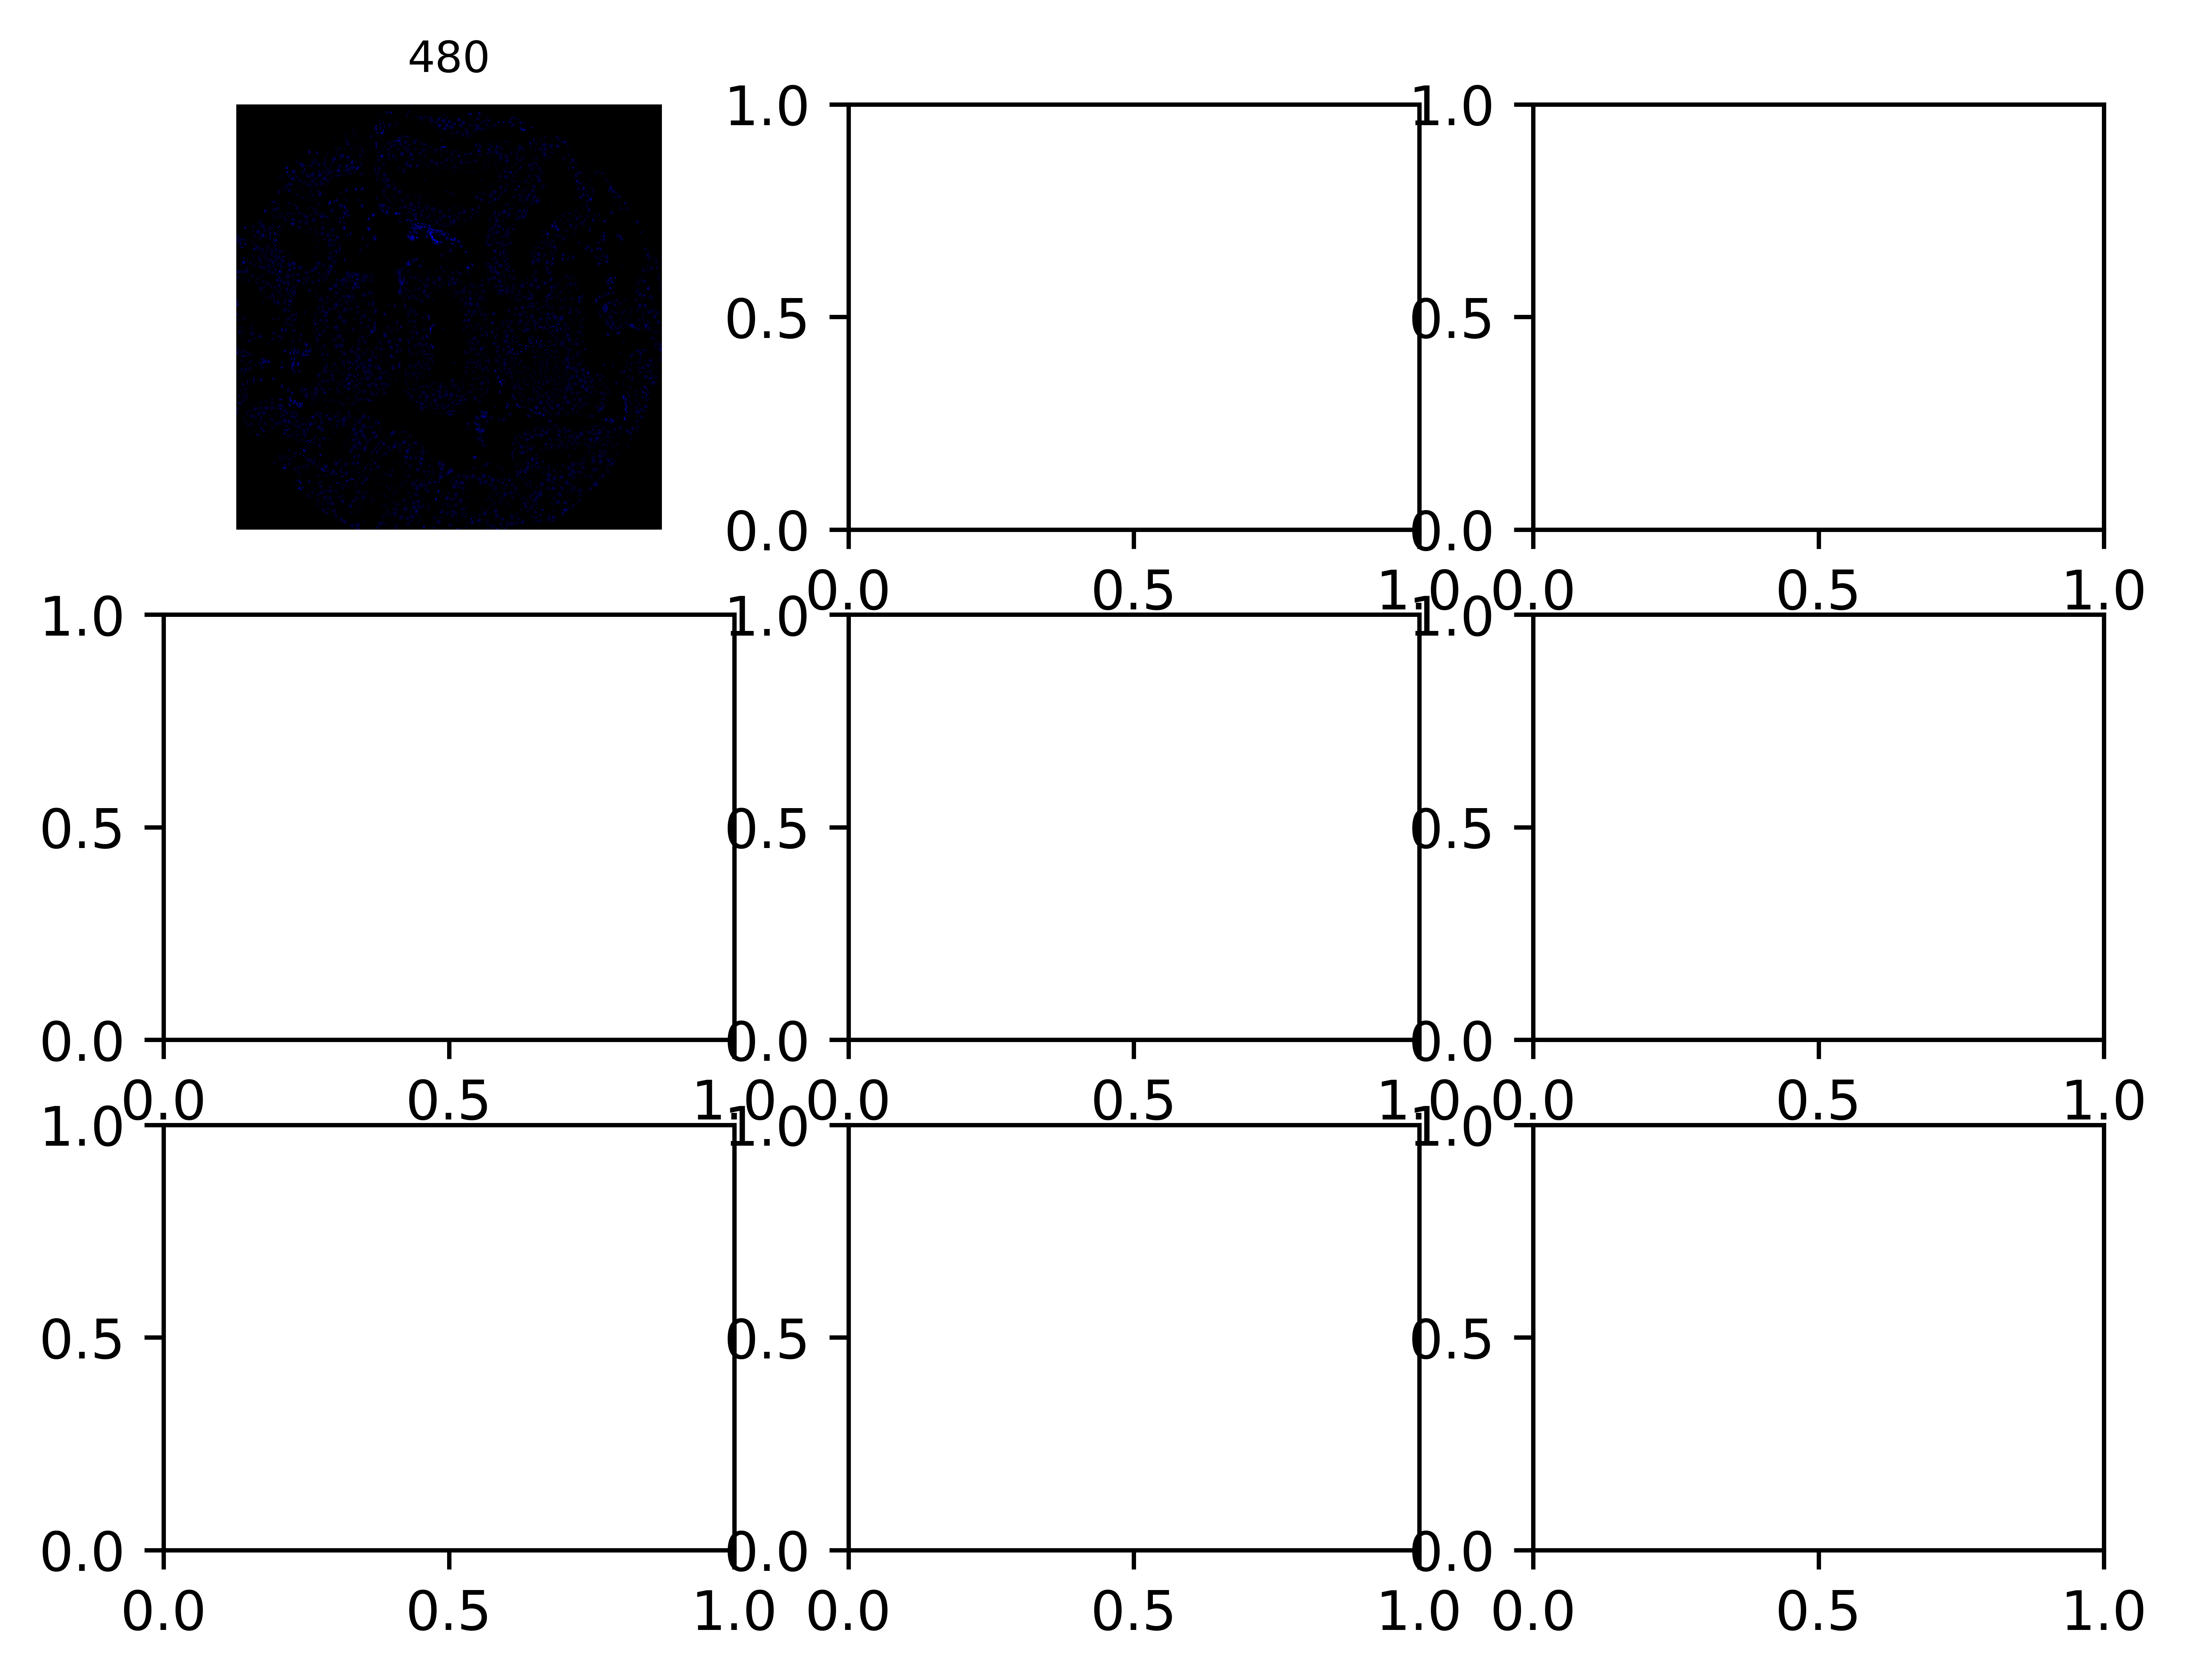

In [9]:
### Create image overview

fig, axes = plt.subplots(3,3)
axes[0,0].imshow(selected_tiff[0], cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('480', fontsize=8)
axes[0,1].imshow(selected_tiff[1], cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('520', fontsize=8)
axes[0,2].imshow(selected_tiff[2], cmap = 'gray')
axes[0,2].axis('off')
axes[0,2].set_title('570', fontsize=8)
axes[1,0].imshow(selected_tiff[3], cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('650', fontsize=8)
axes[1,1].imshow(selected_tiff[4], cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('690', fontsize=8)
axes[1,2].imshow(selected_tiff[5], cmap = 'gray')
axes[1,2].axis('off')
axes[1,2].set_title('780', fontsize=8)
axes[2,0].imshow(selected_tiff[6], cmap = 'gray')
axes[2,0].axis('off')
axes[2,0].set_title('DAPI', fontsize=8)
axes[2,1].imshow(selected_tiff[7], cmap = 'gray')
axes[2,1].axis('off')
axes[2,1].set_title('AF', fontsize=8)
axes[2,2].imshow(selected_tiff[8])
axes[2,2].axis('off')
axes[2,2].set_title('COMP', fontsize=8)

plt.savefig('leo_testis/Output/overview.tif', dpi= 1000)

In [10]:
thresh_sel = np.copy(selected_tiff[:8])
for i in range(thresh_sel.size):
    thresh_sel[i] = sharpen_sig(selected_tiff[i])
    thresh_sel[i] = cleaning_hole(thresh_sel[i])

/var/folders/ck/1_s31h6x4hl08cn3mg813_6r0000gn/T/ipykernel_39653/942350306.py:16: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (4396, 4396, 3) looks like that of an RGB image.
  thresh =  threshold_otsu(image)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
fig, axes = plt.subplots(3,3)
axes[0,0].imshow(thresh_sel[0], cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('480', fontsize=8)
axes[0,1].imshow(thresh_sel[1], cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('520', fontsize=8)
axes[0,2].imshow(thresh_sel[2], cmap = 'gray')
axes[0,2].axis('off')
axes[0,2].set_title('570', fontsize=8)
axes[1,0].imshow(thresh_sel[3], cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('650', fontsize=8)
axes[1,1].imshow(thresh_sel[4], cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('690', fontsize=8)
axes[1,2].imshow(thresh_sel[5], cmap = 'gray')
axes[1,2].axis('off')
axes[1,2].set_title('780', fontsize=8)
axes[2,0].imshow(thresh_sel[6], cmap = 'gray')
axes[2,0].axis('off')
axes[2,0].set_title('DAPI', fontsize=8)
axes[2,1].imshow(thresh_sel[7], cmap = 'gray')
axes[2,1].axis('off')
axes[2,1].set_title('AF', fontsize=8)
axes[2,2].axis('off')



plt.savefig('leo_testis/Output/cleanup.tif', dpi= 1000)

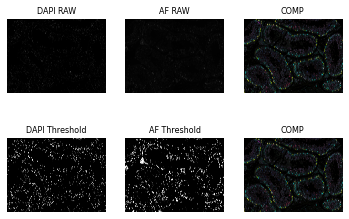

In [8]:
fig, axes = plt.subplots(2,3)
axes[0,0].imshow(selected_tiff[6], cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('DAPI RAW', fontsize=8)
axes[0,1].imshow(selected_tiff[7], cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('AF RAW', fontsize=8)
axes[1,0].imshow(thresh_sel[6], cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('DAPI Threshold', fontsize=8)
axes[1,1].imshow(thresh_sel[7], cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('AF Threshold', fontsize=8)
axes[0,2].imshow(selected_tiff[8])
axes[0,2].axis('off')
axes[0,2].set_title('COMP', fontsize=8)
axes[1,2].imshow(selected_tiff[8])
axes[1,2].axis('off')
axes[1,2].set_title('COMP', fontsize=8)


plt.savefig('leo_testis/Output/bg_pre.tif', dpi= 1000)

In [9]:
# Marker signals (exclude 780nm)
signal_array = thresh_sel[:5]
# DAPI signal
signal_dapi = thresh_sel[6]
# AF signal
signal_AF = thresh_sel[7]

(-0.5, 3727.5, 2791.5, -0.5)

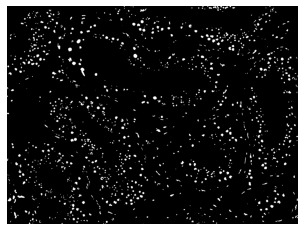

In [10]:
# Background area
bg_signal = np.copy(signal_dapi )
bg_signal = ndi.binary_opening(bg_signal)
bg_signal = ndi.binary_closing(bg_signal)

bg_signal = ndi.binary_fill_holes(bg_signal)


bg_signal = ndi.median_filter(bg_signal, size =10)
bg_signal = ndi.binary_erosion(bg_signal)
bg_signal = ndi.binary_dilation(bg_signal)

#bg_signal = morphology.remove_small_holes(bg_signal)
#bg_signal = morphology.remove_small_objects(bg_signal)

plt.imshow(bg_signal, cmap = 'gray')
plt.axis('off')

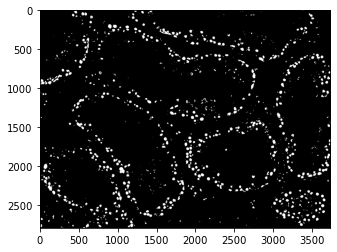

In [19]:
sum_sig = np.sum(signal_array)
sum_sig = np.where(sum_sig == 0, 0, 1)

plt.imshow(sum_sig, cmap = 'gray')

3432361354.py (6): savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error in 3.6


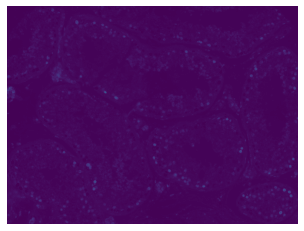

In [31]:

#mask = np.copy(sum_sig)
mask = selected_tiff[7]
# Save mask image
plt.imshow(mask)
plt.axis('off')
plt.savefig('leo_testis/Output/mask.tif', cmap = 'gray', dpi= 1000)

In [32]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

labels, _ = model.predict_instances(mask)

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


2022-10-06 12:50:20.144637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


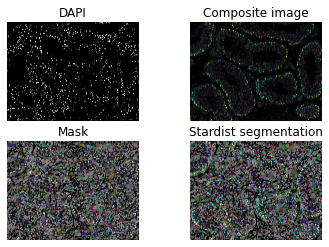

In [33]:
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(signal_dapi, cmap = 'gray')
axs[0,0].axis('off')
axs[0,0].set_title("DAPI")

axs[0,1].imshow(selected_tiff[8])
axs[0,1].axis('off')
axs[0,1].set_title('Composite image')

axs[1,0].imshow(render_label(labels, img=mask))
axs[1,0].axis('off')
axs[1,0].set_title('Mask')

axs[1,1].imshow(render_label(labels, img=selected_tiff[8]))
axs[1,1].axis('off')
axs[1,1].set_title('Stardist segmentation')

plt.savefig('leo_testis/Output/stardist_overlap.tif', dpi= 1000)

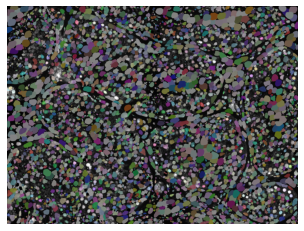

In [34]:
plt.imshow(render_label(labels, img=mask))
plt.axis('off')
plt.savefig('leo_testis/Output/render_lab.tif', dpi= 1000)


In [25]:
values, counts = np.unique(labels, return_counts=True)

# Find the outliers of labels from Stardist

q1 = np.quantile(counts[1:], .25)
q3 = np.quantile(counts[1:], .75)
iqr = q3-q1
min_out = q1 -1.5*iqr
max_out = q1 +1.5*iqr


In [26]:
np.amax(labels)

1288

In [27]:
dataset = thresh_sel
len_val =np.amax(labels)
ext_mx = []

for im in dataset :
    data_mx = normalize(im)
    sum_mx = np.zeros((len_val,), dtype = float)
    
    for label in range(1, len_val ):
                check_mx = np.where(labels == label, 1, 0)
                expression = check_mx * data_mx
                sum_mx[label] = np.sum(expression)
    ext_mx.append(sum_mx)

In [28]:
import pandas as pd

df = pd.DataFrame(np.array(ext_mx).T, columns = ['im_480', 'im_520', 'im_570', 'im_650', 'im_690', 'im_780', 'DAPI', 'AF'])

In [29]:
df

,im_480,im_520,im_570,im_650,im_690,im_780,DAPI,AF
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,1130.0,0.0,0.0,1387.0,1112.0,0.0,0.0
2,786.0,1574.0,0.0,0.0,0.0,478.0,8.0,0.0
3,269.0,0.0,0.0,1328.0,0.0,0.0,0.0,1384.0
4,1154.0,0.0,0.0,790.0,0.0,14.0,0.0,218.0
...,...,...,...,...,...,...,...,...
1283,0.0,14.0,0.0,0.0,0.0,24.0,0.0,0.0
1284,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
1285,0.0,0.0,0.0,14.0,0.0,18.0,14.0,18.0
1286,0.0,0.0,0.0,8.0,0.0,17.0,0.0,17.0


In [63]:
df_drop = df.iloc[1:, :5]
#df_drop = df_drop.loc[(df_drop != 0).any(axis=1)]
df_drop = df_drop.div(df_drop.sum(axis=1), axis=0)
df_drop = np.around(df_drop, 0)
#df_drop = df_drop.dropna()
#df_drop = df_drop.loc[(df_drop != 0).any(axis=1)]

#df_drop = df_drop.nan_to_num(0)
#df_drop.to_csv('leoout.csv') 
df_drop

,im_480,im_520,im_570,im_650,im_690
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1283,0.0,1.0,0.0,0.0,0.0
1284,0.0,0.0,0.0,0.0,1.0
1285,0.0,0.0,0.0,1.0,0.0
1286,0.0,0.0,0.0,1.0,0.0


In [65]:
df_drop = df.iloc[1:, :5]
#df_drop = df_drop.loc[(df_drop != 0).any(axis=1)]
df_drop = df_drop.div(df_drop.sum(axis=1), axis=0)
#df_drop = np.around(df_drop, 0)
#df_drop = df_drop.dropna()
#df_drop = df_drop.loc[(df_drop != 0).any(axis=1)]

#df_drop = df_drop.nan_to_num(0)
df_drop.to_csv('leoout.csv') 
df_drop

,im_480,im_520,im_570,im_650,im_690
1,0.018713,0.440546,0.0,0.000000,0.540741
2,0.333051,0.666949,0.0,0.000000,0.000000
3,0.168441,0.000000,0.0,0.831559,0.000000
4,0.593621,0.000000,0.0,0.406379,0.000000
5,0.028766,0.376046,0.0,0.000000,0.595188
...,...,...,...,...,...
1283,0.000000,1.000000,0.0,0.000000,0.000000
1284,0.000000,0.000000,0.0,0.000000,1.000000
1285,0.000000,0.000000,0.0,1.000000,0.000000
1286,0.000000,0.000000,0.0,1.000000,0.000000


In [ ]:
height,width = labels.shape
labels 

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_drop)

#print(pca.explained_variance_ratio_)

principalComponents = pca.fit_transform(df_drop)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf.plot.scatter(x='PC1', y='PC2', alpha = .5)


In [ ]:
principalDf.plot.scatter(x='PC2', y='PC3', alpha = .5)

In [45]:
principalComponents.shape

(1159, 5)

In [46]:
correlation_matrix = df_drop.corr()

In [47]:
df_drop.values

array([[0.00000000e+00, 0.00000000e+00, 3.76612516e-05, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.32966969e-05, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])